# Matplotlib 실습2

**[실습 유의 사항]**

https://docs.google.com/spreadsheets/d/1LufpYknSbN7179sVPreZ-hDJ7vHaZ1l64XMZeivjySQ/edit?usp=sharing

공유한 파일에 실습 현황을 공유해 주세요. 수업 진행에 도움이 됩니다.

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'svg'

# !apt install -y fonts-nanum
# !fc-cache -fv

applyfont = "LG Smart UI"

import matplotlib.font_manager as fm
if not any(map(lambda ft: ft.name == applyfont, fm.fontManager.ttflist)):
  fm.fontManager.addfont("/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf")

plt.rc("font", family=applyfont)
plt.rc("axes", unicode_minus=False)

---

**문제1 Titanic**   

Titanic Data를 이용해서 다양한 그래프를 그려봅시다.

titanic.csv 파일을 read_csv로 읽어와서 데이터의 형태를 살펴보세요.

```
pd.read_csv('/content/titanic.csv')
```


In [3]:
df = pd.read_csv("titanic.csv")
df.info()
df.head()
df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


---

**문제1-1 생존자/사망자 비율**

생존자와 사망자의 비율을 Pie Chart를 이용해서 그려봅시다.

그리고자 하는 Pie Chart는 다음의 조건을 만족합니다.
1. 각 해당하는 영역의 비율을 소숫점 아래 한자리까지 %단위로 표현합니다.
2. 각 영역에 맞게 '생존' 또는 '사망'을 표시하도록 합니다.
3. 색을 바꿔보세요
  - '사망'에 해당되는 구역은 'gray'를 사용합니다.
  - '생존'에 해당되는 구역은 'crimson'을 사용합니다.
4. '생존'에 해당되는 구역은 explode를 활용하여 두드러질 수 있도록 해보세요
5. 그림자를 추가해보세요
6. 범례를 오른족 위에 추가해보세요
7. 제목은 '생존자/사망자 비율'로 합니다. 글씨 크기를 18로 설정해보세요

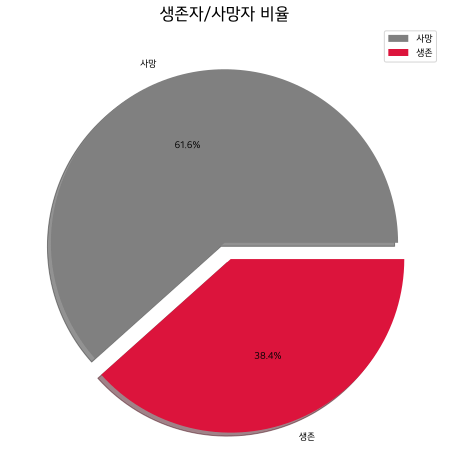

In [4]:
# print(len(df['Survived']))
survival_labels = ["사망", "생존"]
colors = ["gray", "crimson"]
ex = [0, 0.1]
# print((df['Survived'].value_counts()/len(df['Survived']))*100)
survival_data = df['Survived'].value_counts()
survival_data_ratio = (df['Survived'].value_counts()/len(df['Survived']))*100

plt.figure(figsize=(10,8))


plt.pie(survival_data_ratio, explode=ex, autopct='%.1f%%', colors=colors, shadow=True, labels=survival_labels, startangle=0)

plt.legend(loc='upper right', fontsize=10)
plt.title("생존자/사망자 비율", fontsize=18)
plt.show()

---

**문제1-2 클래스와 성별에 따른 생존/사망자**   

조금 더 자세히 데이터를 분석해봅시다.

총 3가지의 Plot을 그려보고자 합니다.

3가지 Plot의 배치는 다음과 같습니다. subplot을 이용해보세요
1. 커다란 하나의 figure를 좌우로 균등하게 나눕니다.
2. 왼쪽 반에 생존자와 사망자의 수를 표현한 Bar Plot을 둡니다.
3. 오른쪽 반은 다시 위아래로 균등하게 나눕니다.
4. 오른쪽 반의 윗편은 클래스에 따른 생존자와 사망자 수를 표현한 Bar Plot을 둡니다.
5. 오른쪽 반의 아랫편은 성별에 따른 생존자와 사망자 수를 표현한 Bar Plot을 둡니다.

3가지의 Plot들이 갖는 각각의 조건은 다음과 같습니다.

1. 생존/사망자 Plot(왼쪽에 배치되는 Plot)
  - x축은 생존 여부를 나타내고, y축은 인원 수를 나타냅니다.
  - x축은 '사망', '생존' 으로 표시될 수 있도록 합니다.
  - Bar의 넓이는 0.5로 합니다.
  - 제목은 '생존/사망 수'로 합니다.
2. Pclass에 따른 생존/사망자 수(오른쪽 위에 배치되는 Plot)
  - x축은 Pclass를 나타내고, y축은 인원 수를 나타냅니다.
  - Side-by-Side Bar Plot으로 표현합니다.
    - 각 Pclass 마다 사망/생존자 수를 나란히 배치해보세요
  - 제목은 'Pclass 별 생존/사망 수'로 합니다.
3. 성별에 따른 생존/사망자 수(오른쪽 아래에 배치되는 Plot)
  - x축은 성별을 나타내고, y축은 인원 수를 나타냅니다.
  - 마찬가지로 Side-by-Side Bar Plot을 이용해보세요
    - 각 성별 마다 사망/생존자 수를 나란히 배치해보세요
  - 제목은 '성별 별 생존/사망 수'로 합니다.

모든 Plot들의 공통적인 조건들은 다음과 같습니다.
1. 사망자의 색은 'gray'로 생존자의 색은 'crimson'으로 나타내보세요
2. Grid를 이용해서 가로선을 추가해보세요. (형태는 점전으로 합니다.)


In [5]:

survived_by_pclass_data = np.zeros((2, 3))
# print(survived_by_pclass_data.head())
# print(survived_by_pclass_data.get_group("Pclass"))
# print(type(survived_by_pclass_data))
for key, items in df[['Survived', 'Pclass']].groupby(['Survived', 'Pclass']):
    survived_by_pclass_data[key[0], key[1]-1] = len(items)
    # print(key)
    # print(items)

pclass_labels = ["Pclass1", "Pclass2", "Pclass3"]
print(survived_by_pclass_data)
# np.sum(survived_by_pclass_data)

[[ 80.  97. 372.]
 [136.  87. 119.]]


In [6]:
survived_by_sex_data = np.zeros((2, 2))
for key, items in df[['Survived', 'Sex']].groupby(['Survived', 'Sex']):
    survived_by_sex_data[key[0], 0 if key[1] == 'female' else 1] = len(items)
# survived_by_sex_data.sum()
sex_labels = ["여성", "남성"]

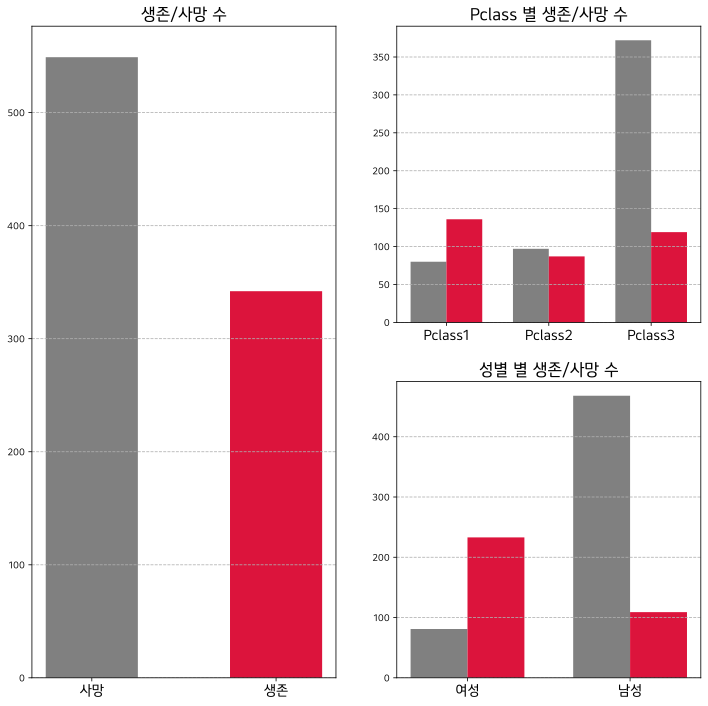

In [7]:
x = np.arange(1, 3, 1)
width = 0.5
plt.figure(figsize=(12,12))


plt.subplot(1, 2, 1)
plt.title("생존/사망 수", fontsize=18)
plt.grid(True, axis='y', linestyle='--')
plt.bar(x, survival_data, width, color=colors)
plt.xticks(x, survival_labels, fontsize=15)


plt.subplot(2, 2, 2)
x = np.arange(1, 4, 1)
width = 0.35
plt.title("Pclass 별 생존/사망 수", fontsize=18)
plt.grid(True, axis='y', linestyle='--')
plt.bar(x-width/2, survived_by_pclass_data[0], width, color="gray")
plt.bar(x+width/2, survived_by_pclass_data[1], width, color="crimson")
plt.xticks(x, pclass_labels, fontsize=15)


plt.subplot(2, 2, 4)
x = np.arange(1, 3, 1)
width = 0.35
plt.title("성별 별 생존/사망 수", fontsize=18)
plt.grid(True, axis='y', linestyle='--')
plt.bar(x-width/2, survived_by_sex_data[0], width, color="gray")
plt.bar(x+width/2, survived_by_sex_data[1], width, color="crimson")
plt.xticks(x, sex_labels, fontsize=15)

plt.show()

---

**문제2**

Pandas의 Dataframe에서 직접 Plot하는 방법을 활용해봅시다.

salse_data를 활용하기 위해서 read_csv로 읽어온 후, 데이터의 형태를 확인해보세요

data는 매월마다 제품들의 판매 정보가 들어있습니다.
- 해당 data에는 달에 대한 정보와, 통계 정보도 들어있습니다.
- 이 data 중, 각 제품들에 대한 정보만 사용하도록 하겠습니다.
  - facecream ~ moisturizer

다음 조건을 고려하여 data를 plot 해보세요
1. x축은 몇월인지를 나타냅니다.
2. y축은 판매량을 나타냅니다.

다음 조건은 고려하지 않으셔도 됩니다.
- 위의 조건을 제외한 나머지는 전부 편하신대로 하시면 됩니다.
  - Dataframe에서 바로 plot을 그리는 연습을 해보시면 됩니다.

In [8]:
sales = pd.read_csv('sales_data.csv')
sales.info()
print(sales.head())
sales.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   month_number  12 non-null     int64
 1   facecream     12 non-null     int64
 2   facewash      12 non-null     int64
 3   toothpaste    12 non-null     int64
 4   bathingsoap   12 non-null     int64
 5   shampoo       12 non-null     int64
 6   moisturizer   12 non-null     int64
 7   total_units   12 non-null     int64
 8   total_profit  12 non-null     int64
dtypes: int64(9)
memory usage: 992.0 bytes
   month_number  facecream  facewash  toothpaste  bathingsoap  shampoo  \
0             1       2500      1500        5200         9200     1200   
1             2       2630      1200        5100         6100     2100   
2             3       2140      1340        4550         9550     3550   
3             4       3400      1130        5870         8870     1870   
4             5       3600      17

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
7,8,3700,1400,5860,9960,2860,1400,36140,361400
8,9,3540,1780,6100,8100,2100,1780,23400,234000
9,10,1990,1890,8300,10300,2300,1890,26670,266700
10,11,2340,2100,7300,13300,2400,2100,41280,412800
11,12,2900,1760,7400,14400,1800,1760,30020,300200


<AxesSubplot:xlabel='month_number'>

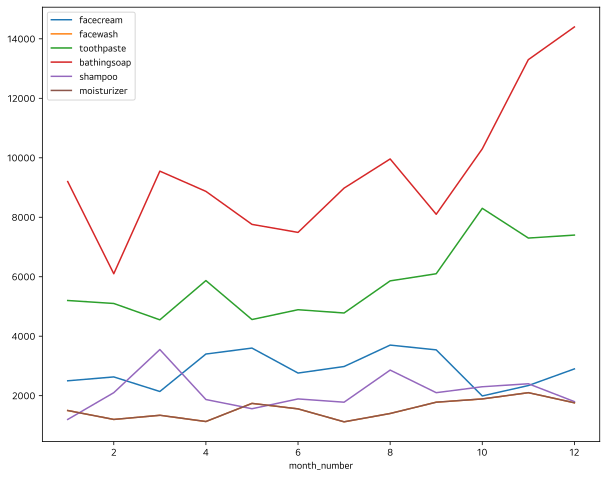

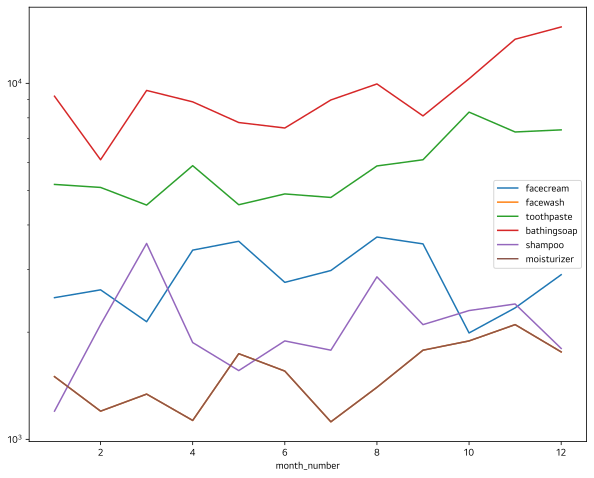

In [9]:
sales_by_month = sales.set_index('month_number')
sales_by_month = sales_by_month.loc[:, 'facecream':'moisturizer']
sales_by_month.plot(figsize=(10,8))
sales_by_month.plot(figsize=(10,8), logy=True)

---

**문제3 Vaccination Status in Seoul**

vaccine_seoul.csv 파일에 담겨있는 서울의 백신 접종 현황 데이터를 다양한 그래프와 함께 분석해봅시다.

```
vaccine = pd.read_csv('/content/vaccine_seoul.csv')
```

해당 데이터를 살펴보시면, 

'접종일'에 해당하는 값들이 Time Series의 형태와 유사한 것을 확인할 수 있습니다. 

하지만, 이 '접종일' 값들의 dtype은 Time Series가 아닌, Object 인 것을 확인해보실 수 있습니다.

또한, 데이터들이 '접종일'의 역순으로 정리되어 있는 것도 확인해보실 수 있습니다.

Time Series를 활용하는 것을 연습해보기 위해서 '접종일'의 dtype을 변경해봅시다.

```
vaccine['접종일'] = pd.to_datetime(vaccine['접종일'])
```
'접종일' column을 index로 설정하고, 날짜가 증가하는 방향으로 정렬해봅시다.

```
vaccine.set_index('접종일', inplace=True)
vaccine.sort_index(inplace=True)
```

In [10]:
vaccine = pd.read_csv('vaccine_seoul.csv')

In [11]:
vaccine['접종일'] = pd.to_datetime(vaccine['접종일'])
vaccine.info()
vaccine.head()
vaccine_by_date = vaccine.set_index('접종일')
vaccine_by_date.sort_index(inplace=True)
vaccine_by_date.info()
vaccine_by_date.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   접종일         205 non-null    datetime64[ns]
 1   접종대상자       205 non-null    int64         
 2   당일 1차접종자 수  201 non-null    float64       
 3   1차접종 누계     205 non-null    int64         
 4   1차접종률(%)    205 non-null    float64       
 5   당일 2차접종자 수  201 non-null    float64       
 6   2차접종 누계     205 non-null    int64         
 7   2차접종률(%)    205 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(3)
memory usage: 12.9 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 205 entries, 2021-04-21 to 2021-11-17
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   접종대상자       205 non-null    int64  
 1   당일 1차접종자 수  201 non-null    float64
 2   1차접종 누계     205 non-null    int64  
 3   1차접종률(%)    2

,접종대상자,당일 1차접종자 수,1차접종 누계,1차접종률(%),당일 2차접종자 수,2차접종 누계,2차접종률(%)
접종일,,,,,,,
2021-04-21,1019322,22501.0,291857,28.6,2358.0,13543,1.3
2021-04-22,1023538,27074.0,317386,31.0,2479.0,15901,1.6
2021-04-23,1027740,10195.0,345764,33.6,119.0,18376,1.8
2021-04-24,1023346,200.0,350427,34.2,0.0,18513,1.8
2021-04-25,1023346,23323.0,350631,34.2,3411.0,18513,1.8


---

**문제3-1 일별 접종 데이터**

정렬된 데이터를 1차 접종과 2차 접종으로 분류하여 서로 비교해보고자 합니다.

비교는 2가지의 형태로 진행하겠습니다.

1. 일별 1차/2차 접종 누계 그래프
  - 꺾은선 그래프를 활용합니다.
2. 일별 1차/2차 당일 접종자 수 그래프
  - Bar Chart를 사용합니다.

두 그래프는 subplot을 이용해서 위, 아래로 나란히 그리도록 하겠습니다.


첫 번째 그래프를 그려봅시다.

첫 번째 그래프는 다음과 같은 조건을 만족합니다.
1. 매일 마다 1차/2차 접종 누계 데이터의 변화를 꺾은선 그래프로 나타냅니다.
  - '1차접종 누계'와 '2차접종 누계' 항목을 사용합니다.
  - plt.plot을 이용해보세요
2. x축은 날짜를 나타냅니다.
  - 가독성을 위해서 모든 날짜를 표현하지 않으려 합니다.
  - 매 달 1일의 위치에만 해당 달을 표시하도록 합니다.
    - 예: '2021-5-1' 위치에 '5월'을 표시, '2021-6-1' 위치에 '6월'을 표시
    - 1일 데이터가 없는 4월은 표시하지 않으셔도 됩니다.
3. y축은 1차/2차접종 누계를 나타냅니다.
4. 2개의 꺾은선 그래프를 하나의 plot에 표현합니다.
  - 먼저, '1차접종 누계' 항목의 데이터를 일별로 표현합니다.
    - label을 '1차' 로 설정해보세요.
  - 추가로, '2차접종 누계' 항목의 데이터를 일별로 표현합니다.
    - label을 '2차' 로 설정해보세요.
  - 그래프의 색은 서로 구분만 가능하면 됩니다.
5. Grid를 추가해봅시다.
6. 범례를 추가해봅시다.
7. 제목을 '회차 별 접종 누계'로 설정합니다.

위에서 언급되지 않은 조건들은 편하신대로 구성하시면 됩니다.

두 번째 그래프를 그려봅시다.

두 번째 그래프는 다음과 같은 조건을 만족합니다.
1. 매일 마다 1차/2차 당일 접종자 수를 Bar Plot으로 표현합니다.
  - '당일 1차접종자 수' 와 '당일 2차접종자 수' 데이터를 활용합니다.
  - plt.bar 를 활용해보세요
2. x축은 날짜를 나타냅니다.
  - 첫 번째 그래프와 동일하게 매월 1일에 해당되는 위치에 해당 달만 표시합니다.
3. y축은 해당일에 1차/2차를 접종한 사람의 수를 나타냅니다.
4. 2개의 Bar 그래프를 하나의 Plot에 표현합니다.
  - Side-by-Side Bar Plot을 이용해보세요.
    - width는 0.3으로 합니다.
    - 이때, 현재 index는 정수가 아닌 Time Serise로 되어있기 때문에 별도의 처리가 필요합니다.
    - Time Series는 width/2를 빼거나 더하는 연산을 수행할 수 없습니다.
    - 이를 해결하기 위해서 reset_index를 사용하셔도 좋습니다.
  - 첫 번째 그래프와 동일하게 각 Bar 그래프에 '1차', '2차' label을 부여합니다.
  - 그래프의 색은 서로 구분만 가능하면 됩니다.
5. Grid를 추가합니다 
6. 범례를 추가합니다.
7. 제목은 '회차 별 당일 접종자 수'로 설정합니다.

마찬가지로 위 조건에서 언급되지 않은 조건들은 편하신대로 구성하시면 됩니다.


In [12]:
print(vaccine_by_date.index[-1])
pd.date_range(vaccine_by_date.index[0], vaccine_by_date.index[-1], freq='MS')

#print(vaccine_by_date[vaccine_by_date.index.is_month_start])
print(np.where(vaccine_by_date.index.is_month_start)) #, vaccine_by_date.index.array))
#print(vaccine_by_date.index.array.index[vaccine_by_date.index.is_month_start])
# vaccine_by_date.where(vaccine_by_date.index.day == 1)
[f'{m}월' for m in range(5, 12)]

2021-11-17 00:00:00
(array([ 10,  41,  71, 102, 133, 163, 194], dtype=int64),)


['5월', '6월', '7월', '8월', '9월', '10월', '11월']

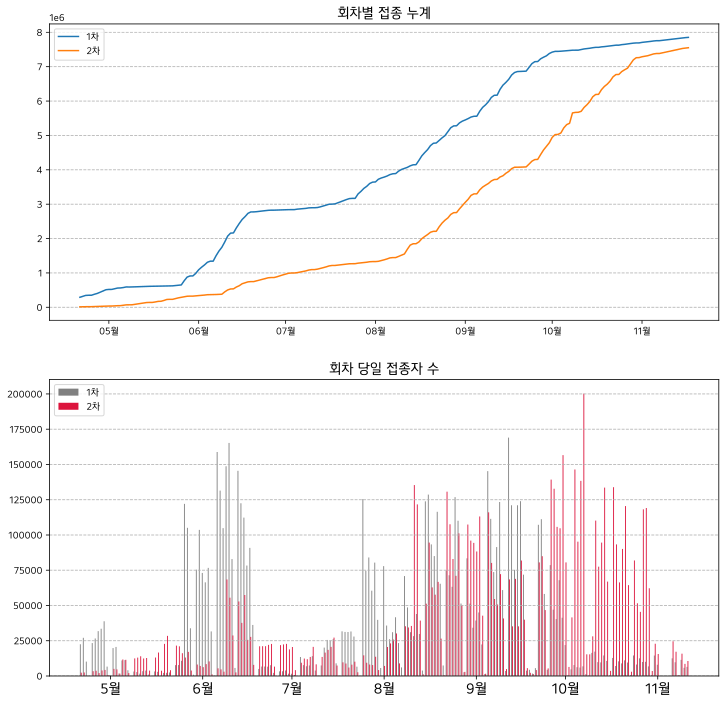

In [13]:
# vaccine_by_date[['1차접종 누계', '2차접종 누계']].plot(figsize=(10, 8))
import matplotlib.dates as mdates
dateFmt = mdates.DateFormatter('%m월')
#ax.xaxis.set_major_formatter(dateFmt)
plt.figure(figsize=(12,12))
ax = plt.subplot(2, 1, 1)
plt.title("회차별 접종 누계", fontsize=15)
plt.grid(True, axis='y', linestyle='--')
plt.plot(vaccine_by_date.index, vaccine_by_date[['1차접종 누계', '2차접종 누계']], label=["1차", "2차"])
ax.xaxis.set_major_formatter(dateFmt)
plt.legend(loc="upper left")
ax = plt.subplot(2, 1, 2)
width = 0.3
x = np.arange(0, len(vaccine_by_date))
plt.title("회차 당일 접종자 수", fontsize=15)
plt.grid(True, axis='y', linestyle='--')
plt.bar(x-width/2, vaccine_by_date['당일 1차접종자 수'], width, color="gray",  label="1차")
plt.bar(x+width/2, vaccine_by_date['당일 2차접종자 수'], width, color="crimson", label="2차")
# ticks = np.where(vaccine_by_date.index.is_month_start)
(ticks, ) = np.where(vaccine_by_date.index.is_month_start)
plt.xticks(ticks, [f'{m}월' for m in range(5, 12)], fontsize=15)
plt.legend(loc="upper left")
plt.show()

---

**문제3-2 월별 당월 접종자 수**

그래프를 그려보니 매일 당일 접종자 수는 data가 너무 상세하여,

요약된 데이터가 필요할 것 같습니다.

이번에는 달을 주기로 당월 접종자 수를 Bar Plot으로 표현해 봅시다.

- '접종일'로 indexing 되어 있는 상태를 활용하셔도 되고, reset_index가 되어 있는 상태를 활용하셔도 됩니다.

그래프는 다음과 같은 조건을 만족합니다.
1. x축은 해당 달을 나타냅니다.
  - 4월에 접종한 데이터를 표현하기 위해서 이번에는 4월부터 표시합니다.
2. y축은 해당 달에 접종을 한 사람의 수를 의미합니다.
3. 하나의 plot에 1차와 2차의 정보를 나란히 배치합니다.
  - Side-by-Side Bar Plot
  - 마찬가지로 '1차', '2차' 로 label을 부여합니다.
  - 색은 서로 구분만 가능하면 됩니다.
4. Grid를 표현해보세요
5. 범레를 표현해보세요
6. 제목은 '월별 당월 접종자 수'로 설정합니다.

위에서 언급되지 않은 조건은 편하신대로 구성하셔도 좋습니다.

In [14]:
vaccine_by_month = vaccine_by_date.resample('M').sum()
vaccine_by_month['당일 1차접종자 수']
vaccine_by_month['당일 2차접종자 수']
vaccine_by_month.index = vaccine_by_month.index.strftime("%m월")
vaccine_by_month

,접종대상자,당일 1차접종자 수,1차접종 누계,1차접종률(%),당일 2차접종자 수,2차접종 누계,2차접종률(%)
접종일,,,,,,,
04월,10546856,220601.0,3860085,364.4,23046.0,227606,21.4
05월,39987472,564992.0,19998296,1594.5,301754.0,5150690,388.4
06월,95013168,1678716.0,67042793,2077.2,604419.0,18687996,578.3
07월,118399539,800044.0,95000326,2487.2,307982.0,36181282,944.5
08월,207763511,1787685.0,137344326,2247.8,1722825.0,61520424,963.5
09월,286704754,1971450.0,194004812,2028.6,1864860.0,116626306,1219.9
10월,294681908,271875.0,234268665,2464.5,2330349.0,190459036,2004.4
11월,104564548,54233.0,85506634,899.6,93040.0,81529763,857.6


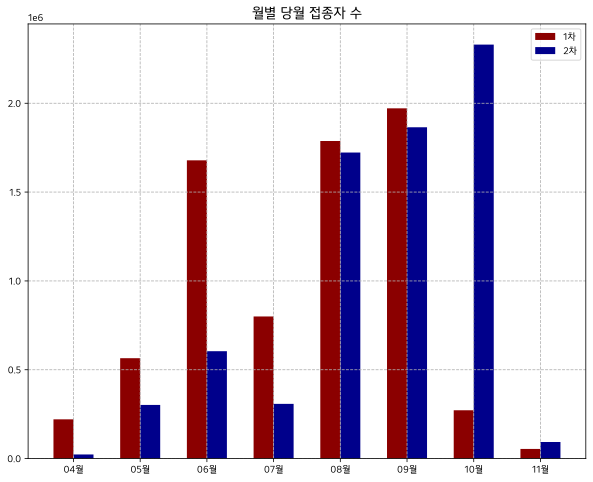

In [15]:
# vaccine_by_date.resample('M').sum()
# vaccine_by_month = (vaccine_by_date.resample('M').sum()
# vaccine_by_month['당일 1차접종자 수']
# vaccine_by_month['당일 2차접종자 수']

plt.figure(figsize=(10,8))
# ax = plt.subplot(2, 1, 1)
plt.title("월별 당월 접종자 수", fontsize=15)
plt.grid(True, axis='both', linestyle='--')
# plt.plot(vaccine_by_date.index, vaccine_by_date[['1차접종 누계', '2차접종 누계']], label=["1차", "2차"])
# ax.xaxis.set_major_formatter(dateFmt)
# plt.legend(loc="upper left")
# ax = plt.subplot(2, 1, 2)
width = 0.3
x = np.arange(0, len(vaccine_by_month))
# plt.title("회차 당일 접종자 수", fontsize=15)
# plt.grid(True, axis='y', linestyle='--')
plt.bar(x-width/2, vaccine_by_month['당일 1차접종자 수'], width, color="darkred", label="1차")
plt.bar(x+width/2, vaccine_by_month['당일 2차접종자 수'], width, color="darkblue", label="2차")
# # ticks = np.where(vaccine_by_date.index.is_month_start)
# # (ticks, ) = np.where(vaccine_by_date.index.is_month_start)
plt.xticks(range(len(vaccine_by_month)), vaccine_by_month.index, fontsize=10)
plt.legend(loc="upper right")
# plt.show()

---

**문제4 지하철**

subway.csv 파일의 data를 읽어서 여러가지 그래프를 그려봅시다.

먼제 subway.csv를 읽은 데이터를 살펴봅시다.
```
df = pd.read_csv('/content/subway.csv')
```
데이터를 보면, column의 이름이 잘못되어 있는 것을 확인할 수 있습니다.

저희가 원하는 column의 이름들은 첫 번째 row에 있습니다.

따라서 첫 번째 row를 column의 이름으로 설정해봅시다.
```
cols = df.iloc[0]
df.rename(columns = cols, inplace=True)
```
이제 첫 번째 row는 필요 없으므로 데이터에서 제외합니다.
```
subway = df[1:]
```
데이터를 표현할 때 '합 계' column을 사용하게 되는데,

해당 column의 dtype을 살펴보면 숫자가 아닌 object 인 것을 확인할 수 있습니다.

따라서, 계산에 용이하도록 dtype을 int로 변경해봅시다. (astype('int')를 사용하시면 편리합니다.)

```
subway['합 계'] = subway['합 계'].astype('int')
```

이제 마지막으로, column의 이름인 '합 계'를 '합계'로 변경해봅시다.

column들에 있는 띄어쓰기를 지울 수 있습니다.
```
subway.columns = subway.columns.str.replace(" ", "")
```
이제 정리된 data로 이어지는 그래프 문제를 풀어보세요

In [16]:
subway_df = pd.read_csv("subway.csv", skiprows=1)
# cols = df.iloc[0]
# df.rename(columns = cols, inplace=True)

In [17]:
subway_df.info()
subway_df.head()
subway_df.columns = subway_df.columns.str.replace(" ", "")
subway_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200750 entries, 0 to 200749
Data columns (total 26 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   날짜       200750 non-null  object
 1   호선       200750 non-null  object
 2   역번호      200750 non-null  int64 
 3   역명       200750 non-null  object
 4   구분       200750 non-null  object
 5   05 ~ 06  200750 non-null  int64 
 6   06 ~ 07  200750 non-null  int64 
 7   07 ~ 08  200750 non-null  int64 
 8   08 ~ 09  200750 non-null  int64 
 9   09 ~ 10  200750 non-null  int64 
 10  10 ~ 11  200750 non-null  int64 
 11  11 ~ 12  200750 non-null  int64 
 12  12 ~ 13  200750 non-null  int64 
 13  13 ~ 14  200750 non-null  int64 
 14  14 ~ 15  200750 non-null  int64 
 15  15 ~ 16  200750 non-null  int64 
 16  16 ~ 17  200750 non-null  int64 
 17  17 ~ 18  200750 non-null  int64 
 18  18 ~ 19  200750 non-null  int64 
 19  19 ~ 20  200750 non-null  int64 
 20  20 ~ 21  200750 non-null  int64 
 21  21 ~ 22  2

,날짜,호선,역번호,역명,구분,05~06,06~07,07~08,08~09,09~10,...,16~17,17~18,18~19,19~20,20~21,21~22,22~23,23~24,00~01,합계
0,2018/01/01,1호선,150,서울역,승차,373,318,365,785,1047,...,3476,3891,3227,2945,2382,3070,1750,781,96,40393
1,2018/01/01,1호선,150,서울역,하차,205,1040,872,984,1650,...,2885,2845,2337,2131,1669,1404,868,477,147,34730
2,2018/01/01,1호선,151,시청,승차,87,105,124,197,291,...,1027,1102,1278,1163,1032,975,553,214,9,12298
3,2018/01/01,1호선,151,시청,하차,47,294,497,1017,673,...,781,702,552,388,308,236,160,100,39,10945
4,2018/01/01,1호선,152,종각,승차,604,399,191,250,370,...,2127,2172,2171,1873,1935,2084,1458,580,28,22621


---

**문제4-1 호선에 따른 승/하차 총합**

시민들이 각 호선을 얼만큼 사용하는지 알아보고 싶습니다.

따라서, 각 호선마다 총 승/하차 수를 그래프로 그려보고자 합니다.

그래프는 다음과 같은 조건을 만족합니다.
1. x축은 호선을 나타냅니다.
  - 하지만 호선의 순서대로 나타내지 않습니다.
  - 가장 많이 타는 노선과 가장 적게 타는 노선을 쉽게 알아볼 수 있게, 승/하차 수로 정렬하여 그래프를 그려봅시다.
  - 승/하차 수를 많은 호선부터 적은 호선 순서로 정렬하여 표현해 보세요
2. y축은 호선에 따른 총 승/하차 수를 나타냅니다.
3. Bar의 넓이는 0.3으로 설정합니다.
4. 축 제목을 추가해보세요
  - x축 제목은 '호선'으로 설정해보세요
  - y축 제목은 '총 승/하차 수'로 설정해보세요
5. 그래프의 제목은 '호선 당 승/하차 수'로 설정합니다.
6. Grid도 추가합니다.

다음 조건은 고려하지 않으셔도 됩니다.
1. 범례는 추가하지 않으셔도 됩니다.
2. 색은 원하시는 색을 사용하시면 됩니다.
3. 이외의 언급하지 않은 조건들은 편하신대로 구성하시면 됩니다.


In [18]:
subway_by_linenum = subway_df.groupby('호선')['합계'].sum().sort_values(ascending=False)
print(type(subway_by_linenum))
subway_by_linenum.index.array

<class 'pandas.core.series.Series'>


<PandasArray>
['2호선', '7호선', '5호선', '4호선', '3호선', '6호선', '1호선', '8호선']
Length: 8, dtype: object

Text(0, 0.5, '총 승/하차 수')

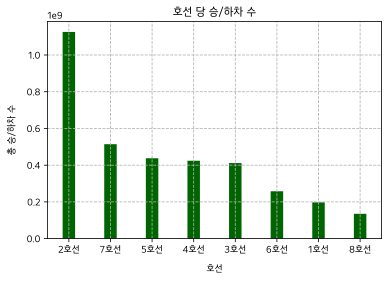

In [19]:
plt.figure(figsize=(6, 4))

# plt.bar(x+width/2, vaccine_by_month['당일 2차접종자 수'], width, color="lightblue", label="2차")
plt.title("호선 당 승/하차 수")
plt.grid(True, axis='both', linestyle='--')
plt.bar(range(subway_by_linenum.size), subway_by_linenum, 0.3, color="darkgreen")
plt.xticks(range(subway_by_linenum.size), subway_by_linenum.index.array)
plt.xlabel('호선', labelpad=10.0)
plt.ylabel('총 승/하차 수', labelpad=10.0)

---

**문제4-2 2호선 잠실역의 시간대 별 승/하차 추이**

2018년 4월 7일의 시간대 별로 2호선 잠실(송파구청)역의 승차/하차의 추이를 살펴보고자 합니다.

이를 위해서 다음의 조건을 만족하는 그래프를 그려보세요

1. 하나의 figure에 2개의 꺾은선 그래프를 표시합니다.
  - 2018년 4월 7일 2호선 잠실(송파구청)역의 시간대 별 승차 추이
  - 2018년 4월 7일 2호선 잠실(송파구청)역의 시간대 별 하차 추이
2. x축은 시간대를 나타냅니다.
  - 5번부터 24번째 까지(column의 index를 0부터 셀 경우)의 column 이름을 사용하시면 됩니다.
  - subway.columns[5:25] 또는 subway.columns[5:-1]을 활용하면 편리합니다.
  - xticks(rotation=45) 옵션을 사용해서 시간대가 기울어져 표시될 수 있도록 합니다.
3. y축은 승객 수를 나타냅니다.
  - x축과 마찬가지로 5번에서 24번까지의 value들을 사용하시면 됩니다.
  - x축과 비슷하게 columns 대신 values[5:-1]을 활용하면 편리합니다.
4. 그래프의 모양은 다음과 같이 합니다.
  - 승차 그래프
    - 색은 color='m' 옵션을 사용합니다.
    - marker='o' 옵션을 사용하여 데이터 지점마다 점을 표시합니다.
    - linestyle='--' 옵션을 사용하여 점선도 추가합니다.
    - label은 '승차'로 설정합니다.
  - 하차 그래프
    - 색은 color='c' 옵션을 사용합니다.
    - marker='o' 옵션을 사용하여 데이터 지점마다 점을 표시합니다.
    - linestyle='--' 옵션을 사용하여 점선도 추가합니다.
    - label은 '하차'로 설정합니다.
5. x축의 제목은 '시간대'로 설정합니다.
6. y축의 제목은 '승객 수'로 설정합니다.
7. 범례를 왼쪽 위에 추가합니다.
8. 그래프의 제목은 '2018/04/07 | 2호선 | 잠실(송파구청)역' 으로 합니다.

위에서 언급한 것 이외의 조건들은 편하신대로 설정하셔도 좋습니다.


In [20]:
subway_df['날짜'] = pd.to_datetime(subway_df['날짜'])
subway_df = subway_df.set_index('날짜')

In [21]:
subway_df.head()
subway_df_20180407 = subway_df.loc['2018-04-07']
jamsil_df = subway_df_20180407[(subway_df_20180407['역명'] == '잠실(송파구청)') & (subway_df_20180407['호선'] == '2호선')].iloc[:, 4:24]
x_labels = jamsil_df.columns

plt.figure(figsize=(15, 10))

plt.title("2018/04/07 | 2호선 | 잠실(송파구청)역")
plt.xlabel('시간대')
plt.ylabel('승객수')

plt.plot(jamsil_df.iloc[0], 'mo--')
plt.plot(jamsil_df.iloc[1], 'co--')
plt.xticks(x_labels)

KeyError: '2018-04-07'